In [ ]:
import pandas as pd


In [ ]:
from google.colab import files

# Upload Will's dataset ZIP
uploaded = files.upload()


Saving 27nm_7-5mM_gel.zip to 27nm_7-5mM_gel (1).zip


In [ ]:
import zipfile
import os

# Find uploaded zip
zip_filename = next(f for f in os.listdir() if f.endswith('.zip'))
extract_path = '/content/extracted'

# Unzip
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List contents
for folder in os.listdir(extract_path):
    print("Found folder:", folder)
    print(os.listdir(os.path.join(extract_path, folder)))


Found folder: __MACOSX
['27nm_7-5mM_gel']
Found folder: 27nm_7-5mM_gel
['continuous', 'discontinuous', '.DS_Store']


In [ ]:
import os

cont_path = '/content/extracted/27nm_7-5mM_gel/continuous'
discont_path = '/content/extracted/27nm_7-5mM_gel/discontinuous'

print("📂 Continuous files:")
print(os.listdir(cont_path))

print("\n📂 Discontinuous files:")
print(os.listdir(discont_path))


📂 Continuous files:
['27nm_7-5mM_gel.csv', '7030_dmfeg_bkg.csv']

📂 Discontinuous files:
['20250617_400pm', '.DS_Store', '20250620_1145am']


In [ ]:
import pandas as pd

# Paths again
cont_file = '/content/extracted/27nm_7-5mM_gel/continuous/27nm_7-5mM_gel.csv'
bkg_file = '/content/extracted/27nm_7-5mM_gel/continuous/7030_dmfeg_bkg.csv'

# Load files, ignoring bad lines
cont_data = pd.read_csv(cont_file, header=None, skiprows=1, on_bad_lines='skip')
bkg_data = pd.read_csv(bkg_file, header=None, skiprows=1, on_bad_lines='skip')

# Confirm shapes
print("Continuous data shape:", cont_data.shape)
print("Background shape:", bkg_data.shape)

# Preview top rows
cont_data.head()


Continuous data shape: (4618, 399)
Background shape: (1248, 3)


/tmp/ipython-input-7-1118809124.py:8: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263

,0,1,2,3,4,5,6,7,8,9,...,389,390,391,392,393,394,395,396,397,398
0,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,...,Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,NaN
1,3034,10,3034,10,3034,10,3034,10,3034,10,...,10,3034,10,3034,10,3034,10,3034,10,NaN
2,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,...,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,NaN
3,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,...,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,NaN
4,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,...,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,NaN


In [ ]:
import numpy as np

# Remove any non-numeric rows
cont_numeric = cont_data.apply(pd.to_numeric, errors='coerce')
cont_clean = cont_numeric.dropna().reset_index(drop=True)

# Reshape into wavenumber + absorbance for each spectrum
spectra = []
wavenumber = cont_clean.iloc[:, 0].values  # Use first wavenumber column

for i in range(0, cont_clean.shape[1] - 1, 2):
    abs_col = cont_clean.iloc[:, i + 1].values
    spectra.append(abs_col)

# Stack into DataFrame
spectra_df = pd.DataFrame(spectra).T
spectra_df.insert(0, 'Wavenumber', wavenumber)

# Confirm shape
print("Parsed spectra shape:", spectra_df.shape)
spectra_df.head()


Parsed spectra shape: (0, 200)


,Wavenumber,0,1,2,3,4,5,6,7,8,...,189,190,191,192,193,194,195,196,197,198


In [ ]:
# Show first 25 rows to locate real numeric data
cont_data.head(25)


,0,1,2,3,4,5,6,7,8,9,...,389,390,391,392,393,394,395,396,397,398
0,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,...,Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,NaN
1,3034,10,3034,10,3034,10,3034,10,3034,10,...,10,3034,10,3034,10,3034,10,3034,10,NaN
2,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,...,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,NaN
3,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,...,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,NaN
4,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,...,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,NaN
5,3050.315918,10,3050.315918,10,3050.315918,10,3050.315918,10,3050.315918,10,...,10,3050.315918,10,3050.315918,10,3050.315918,10,3050.315918,10,NaN
6,3054.39502,10,3054.39502,10,3054.39502,10,3054.39502,10,3054.39502,10,...,10,3054.39502,10,3054.39502,10,3054.39502,10,3054.39502,10,NaN
7,3058.474121,10,3058.474121,10,3058.474121,10,3058.474121,10,3058.474121,10,...,10,3058.474121,10,3058.474121,10,3058.474121,10,3058.474121,10,NaN
8,3062.552979,10,3062.552979,10,3062.552979,10,3062.552979,10,3062.552979,10,...,10,3062.552979,10,3062.552979,10,3062.552979,10,3062.552979,10,NaN
9,3066.63208,10,3066.63208,10,3066.63208,10,3066.63208,10,3066.63208,10,...,10,3066.63208,10,3066.63208,10,3066.63208,10,3066.63208,10,NaN


In [ ]:
# Drop the header row (index 0) and reset index
cont_numeric = cont_data.drop(index=0).reset_index(drop=True)

# Convert all to numeric (now everything should be numeric)
cont_numeric = cont_numeric.apply(pd.to_numeric, errors='coerce')

# Drop rows that contain any NaNs
cont_clean = cont_numeric.dropna().reset_index(drop=True)

# Extract the first wavenumber column (column 0)
wavenumber = cont_clean.iloc[:, 0].values

# Extract absorbance columns: every other column starting at index 1
spectra = []
for i in range(1, cont_clean.shape[1] - 1, 2):  # skip last NaN column
    spectra.append(cont_clean.iloc[:, i].values)

# Combine into final DataFrame
spectra_df = pd.DataFrame(spectra).T
spectra_df.insert(0, "Wavenumber", wavenumber)

# Confirm structure
print("Parsed continuous spectra shape:", spectra_df.shape)
spectra_df.head()


Parsed continuous spectra shape: (0, 200)


,Wavenumber,0,1,2,3,4,5,6,7,8,...,189,190,191,192,193,194,195,196,197,198


In [ ]:
# See first 10 rows of original data, unaltered
pd.set_option('display.max_columns', 100)  # allow wide output
cont_data.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398
0,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,...,Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,NaN
1,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,...,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,0,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,3034,10,NaN
2,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,...,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,NaN,NaN,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,NaN
3,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,...,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,NaN,NaN,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,NaN
4,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,...,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,NaN,NaN,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,30

In [ ]:
import numpy as np

# Drop header row and reset index
data_clean = cont_data.drop(index=0).reset_index(drop=True)

# Convert all to numeric — this will turn non-numeric into NaN
data_clean = data_clean.apply(pd.to_numeric, errors='coerce')

# Now build spectra matrix: absorbances from every second column
# Columns: 0 = WN, 1 = Abs, 2 = WN, 3 = Abs, ...
num_columns = data_clean.shape[1]
abs_cols = [i for i in range(1, num_columns, 2)]  # every absorbance column

# Extract absorbance values
absorbance_matrix = data_clean.iloc[:, abs_cols].values

# Extract wavenumber from column 0 (assume all WN columns are the same)
wavenumber = data_clean.iloc[:, 0].values

# Check shape
print("Absorbance matrix shape:", absorbance_matrix.shape)
print("Wavenumber length:", len(wavenumber))


Absorbance matrix shape: (4617, 199)
Wavenumber length: 4617


In [ ]:
extract_path = "/content/27nm_7-5mM_gel"


In [ ]:
from google.colab import files

# Upload the .zip file
uploaded = files.upload()


Saving 27nm_7-5mM_gel.zip to 27nm_7-5mM_gel (1).zip


In [ ]:
import zipfile
import os

# Unzip the file
zip_path = "27nm_7-5mM_gel.zip"
extract_path = "/content"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Confirm contents
for root, dirs, files in os.walk(extract_path):
    print("Found folder:", root)
    print(os.listdir(root))


Found folder: /content
['.config', '27nm_7-5mM_gel (1).zip', '__MACOSX', '27nm_7-5mM_gel', '27nm_7-5mM_gel.zip', 'sample_data']
Found folder: /content/.config
['hidden_gcloud_config_universe_descriptor_data_cache_configs.db', 'logs', '.last_survey_prompt.yaml', 'configurations', 'gce', '.last_opt_in_prompt.yaml', '.last_update_check.json', 'config_sentinel', 'default_configs.db', 'active_config']
Found folder: /content/.config/logs
['2025.07.04']
Found folder: /content/.config/logs/2025.07.04
['13.33.54.238419.log', '13.34.03.185152.log', '13.34.18.102217.log', '13.34.17.391414.log', '13.34.07.997259.log', '13.33.26.155020.log']
Found folder: /content/.config/configurations
['config_default']
Found folder: /content/__MACOSX
['27nm_7-5mM_gel']
Found folder: /content/__MACOSX/27nm_7-5mM_gel
['continuous', 'discontinuous', '._continuous', '._.DS_Store', '._discontinuous']
Found folder: /content/__MACOSX/27nm_7-5mM_gel/continuous
['._27nm_7-5mM_gel.csv', '._7030_dmfeg_bkg.csv']
Found folde

In [ ]:
cont_folder = os.path.join(extract_path, "27nm_7-5mM_gel", "continuous")
print("Files in continuous folder:\n", os.listdir(cont_folder))


Files in continuous folder:
 ['27nm_7-5mM_gel.csv', '7030_dmfeg_bkg.csv']


In [ ]:
import pandas as pd

# Path to the main spectrum file
cont_file = os.path.join(cont_folder, '27nm_7-5mM_gel.csv')

# Load file without header, skipping the first row (which is a duplicate header)
cont_data = pd.read_csv(cont_file, header=None, skiprows=1, on_bad_lines='skip')

print("Continuous data shape:", cont_data.shape)
cont_data.head(3)


Continuous data shape: (4618, 399)


/tmp/ipython-input-9-431347218.py:7: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,

,0,1,2,3,4,5,6,7,8,9,...,389,390,391,392,393,394,395,396,397,398
0,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,...,Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,NaN
1,3034,10,3034,10,3034,10,3034,10,3034,10,...,10,3034,10,3034,10,3034,10,3034,10,NaN
2,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,...,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,NaN


In [ ]:
import numpy as np

# Drop old header row and reset index
data_clean = cont_data.drop(index=0).reset_index(drop=True)

# Convert everything to numeric (non-numeric becomes NaN)
data_clean = data_clean.apply(pd.to_numeric, errors='coerce')


In [ ]:
# Number of absorbance columns (every second column is Abs)
num_cols = data_clean.shape[1]
abs_cols = [i for i in range(1, num_cols, 2)]  # 1, 3, 5, ...

# Get absorbance matrix (rows = wavenumber, cols = time/spectra)
absorbance_matrix = data_clean.iloc[:, abs_cols].values

# Wavenumber is same for all, just grab from first column
wavenumber = data_clean.iloc[:, 0].values

# Confirm shapes
print("Absorbance matrix shape:", absorbance_matrix.shape)
print("Wavenumber length:", len(wavenumber))


Absorbance matrix shape: (4617, 199)
Wavenumber length: 4617


In [ ]:
# Preview the first few rows
bkg_df = pd.read_csv(bkg_file, header=None)
bkg_df.head()


,0,1,2
0,7030_dmfeg_background,NaN,NaN
1,Wavenumber (cm-1),Abs,NaN
2,3034,10,NaN
3,3038.079102,10,NaN
4,3042.157959,10,NaN


In [ ]:
import zipfile
import os

# Define path
zip_path = "/content/27nm_7-5mM_gel.zip"
extract_path = "/content/extracted"

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Show what's inside
for root, dirs, files in os.walk(extract_path):
    print(f"\nIn folder: {root}")
    print("Subfolders:", dirs)
    print("Files:", files)



In folder: /content/extracted
Subfolders: ['27nm_7-5mM_gel', '__MACOSX']
Files: []

In folder: /content/extracted/27nm_7-5mM_gel
Subfolders: ['discontinuous', 'continuous']
Files: ['.DS_Store']

In folder: /content/extracted/27nm_7-5mM_gel/discontinuous
Subfolders: ['20250617_400pm', '20250620_1145am']
Files: ['.DS_Store']

In folder: /content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm
Subfolders: []
Files: ['27nm_7-5mM_gel.csv', '7030_dmfeg_bkg.csv']

In folder: /content/extracted/27nm_7-5mM_gel/discontinuous/20250620_1145am
Subfolders: []
Files: ['27nm_7-5mM_1145am.csv', '7030_dmfeg_bkg.csv']

In folder: /content/extracted/27nm_7-5mM_gel/continuous
Subfolders: []
Files: ['27nm_7-5mM_gel.csv', '7030_dmfeg_bkg.csv']

In folder: /content/extracted/__MACOSX
Subfolders: ['27nm_7-5mM_gel']
Files: []

In folder: /content/extracted/__MACOSX/27nm_7-5mM_gel
Subfolders: ['discontinuous', 'continuous']
Files: ['._discontinuous', '._.DS_Store', '._continuous']

In folder: /content/ext

In [ ]:
import pandas as pd

# Load the background file
bkg_path = "/content/extracted/27nm_7-5mM_gel/continuous/7030_dmfeg_bkg.csv"
bkg_df = pd.read_csv(bkg_path, header=None)

# Show the first few rows and columns to see structure
bkg_df.head(10)


,0,1,2
0,7030_dmfeg_background,NaN,NaN
1,Wavenumber (cm-1),Abs,NaN
2,3034,10,NaN
3,3038.079102,10,NaN
4,3042.157959,10,NaN
5,3046.237061,10,NaN
6,3050.315918,10,NaN
7,3054.39502,10,NaN
8,3058.474121,10,NaN
9,3062.552979,10,NaN


In [ ]:
# Skip first two junk rows, keep only first two useful columns (ignore NaN col)
bkg_df_clean = bkg_df.iloc[2:, [0, 1]].copy()
bkg_df_clean.columns = ['Wavenumber', 'Absorbance']
bkg_df_clean = bkg_df_clean.dropna()

# Convert to numeric
bkg_df_clean['Wavenumber'] = pd.to_numeric(bkg_df_clean['Wavenumber'], errors='coerce')
bkg_df_clean['Absorbance'] = pd.to_numeric(bkg_df_clean['Absorbance'], errors='coerce')

# Final cleanup in case of NaNs
bkg_df_clean = bkg_df_clean.dropna().reset_index(drop=True)

# Confirm
bkg_df_clean.head()


,Wavenumber,Absorbance
0,3034.000000,10.0
1,3038.079102,10.0
2,3042.157959,10.0
3,3046.237061,10.0
4,3050.315918,10.0


In [ ]:
# Load continuous file with error-tolerant settings
raw_df = pd.read_csv(
    cont_path,
    header=None,
    skiprows=1,  # skip the first label row
    on_bad_lines='skip',
    engine='python'  # more tolerant
)

# Drop NaN columns (some may be leftover junk)
raw_df = raw_df.dropna(axis=1, how='all')

# Confirm shape and peek
print("Raw continuous shape:", raw_df.shape)
raw_df.head()


Raw continuous shape: (5001, 398)


,0,1,2,3,4,5,6,7,8,9,...,388,389,390,391,392,393,394,395,396,397
0,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,...,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs
1,3034,10,3034,10,3034,10,3034,10,3034,10,...,3034,10,3034,10,3034,10,3034,10,3034,10
2,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,...,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10,3038.079102,10
3,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,...,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10,3042.157959,10
4,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,...,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10,3046.237061,10


In [ ]:
import zipfile
import os

zip_path = "/content/27nm_7-5mM_gel.zip"  # Make sure the file is re-uploaded
extract_path = "/content/extracted"

# Extract the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Confirm folder structure again
for root, dirs, files in os.walk(extract_path):
    print(f"\nIn folder: {root}\nSubfolders: {dirs}\nFiles: {files}")




In folder: /content/extracted
Subfolders: ['27nm_7-5mM_gel', '__MACOSX']
Files: []

In folder: /content/extracted/27nm_7-5mM_gel
Subfolders: ['discontinuous', 'continuous']
Files: ['.DS_Store']

In folder: /content/extracted/27nm_7-5mM_gel/discontinuous
Subfolders: ['20250617_400pm', '20250620_1145am']
Files: ['.DS_Store']

In folder: /content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm
Subfolders: []
Files: ['27nm_7-5mM_gel.csv', '7030_dmfeg_bkg.csv']

In folder: /content/extracted/27nm_7-5mM_gel/discontinuous/20250620_1145am
Subfolders: []
Files: ['27nm_7-5mM_1145am.csv', '7030_dmfeg_bkg.csv']

In folder: /content/extracted/27nm_7-5mM_gel/continuous
Subfolders: []
Files: ['27nm_7-5mM_gel.csv', '7030_dmfeg_bkg.csv']

In folder: /content/extracted/__MACOSX
Subfolders: ['27nm_7-5mM_gel']
Files: []

In folder: /content/extracted/__MACOSX/27nm_7-5mM_gel
Subfolders: ['discontinuous', 'continuous']
Files: ['._discontinuous', '._.DS_Store', '._continuous']

In folder: /content/ext

In [ ]:
cont_folder = "/content/extracted/27nm_7-5mM_gel/continuous"
print("Files in continuous folder:\n", os.listdir(cont_folder))


Files in continuous folder:
 ['27nm_7-5mM_gel.csv', '7030_dmfeg_bkg.csv']


✅ Wavenumbers shape: (1219,)
✅ Absorbance matrix shape: (1219, 199)


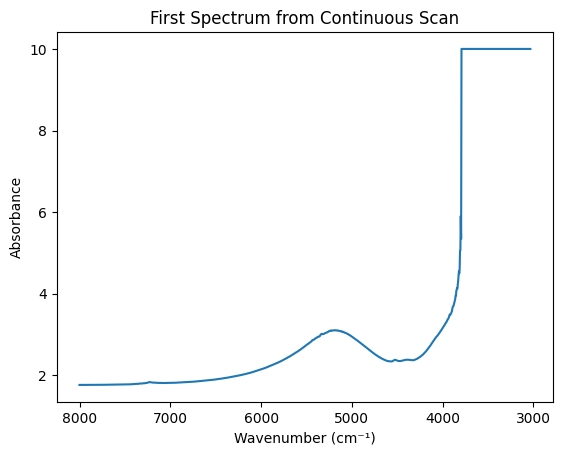

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reload the CSV (safe parse)
cont_path = "/content/extracted/27nm_7-5mM_gel/continuous/27nm_7-5mM_gel.csv"
raw_df = pd.read_csv(cont_path, header=None, on_bad_lines='skip', low_memory=False)

# Drop any row where first cell is not a number
raw_df = raw_df[pd.to_numeric(raw_df[0], errors='coerce').notnull()].reset_index(drop=True)

# Now everything should be cleanly numeric
wavenumbers = raw_df.iloc[:, 0].astype(float).values
abs_matrix = raw_df.iloc[:, 1::2].astype(float).values

print("✅ Wavenumbers shape:", wavenumbers.shape)
print("✅ Absorbance matrix shape:", abs_matrix.shape)

# Plot first spectrum to confirm
plt.plot(wavenumbers, abs_matrix[:, 0])
plt.gca().invert_xaxis()
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Absorbance")
plt.title("First Spectrum from Continuous Scan")
plt.show()


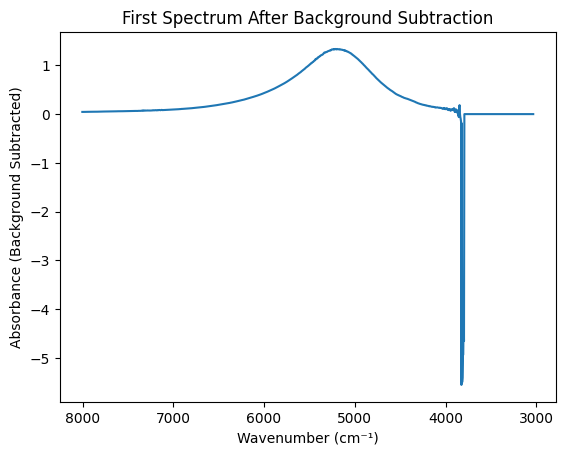

In [ ]:
# Load background file
bkg_path = "/content/extracted/27nm_7-5mM_gel/continuous/7030_dmfeg_bkg.csv"
bkg_df = pd.read_csv(bkg_path, header=None, on_bad_lines='skip', low_memory=False)

# Remove non-numeric rows (header garbage)
bkg_df = bkg_df[pd.to_numeric(bkg_df[0], errors='coerce').notnull()].reset_index(drop=True)

# Extract background wavenumbers and absorbance
bkg_wavenumbers = bkg_df.iloc[:, 0].astype(float).values
bkg_absorbance = bkg_df.iloc[:, 1].astype(float).values

# Sanity check: make sure wavenumbers match
if not np.allclose(wavenumbers, bkg_wavenumbers, rtol=1e-3):
    raise ValueError("Wavenumbers in background and data don't match!")

# Subtract background from all spectra
corrected_abs = abs_matrix - bkg_absorbance[:, np.newaxis]

# Plot corrected spectrum
plt.plot(wavenumbers, corrected_abs[:, 0])
plt.gca().invert_xaxis()
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Absorbance (Background Subtracted)")
plt.title("First Spectrum After Background Subtraction")
plt.show()


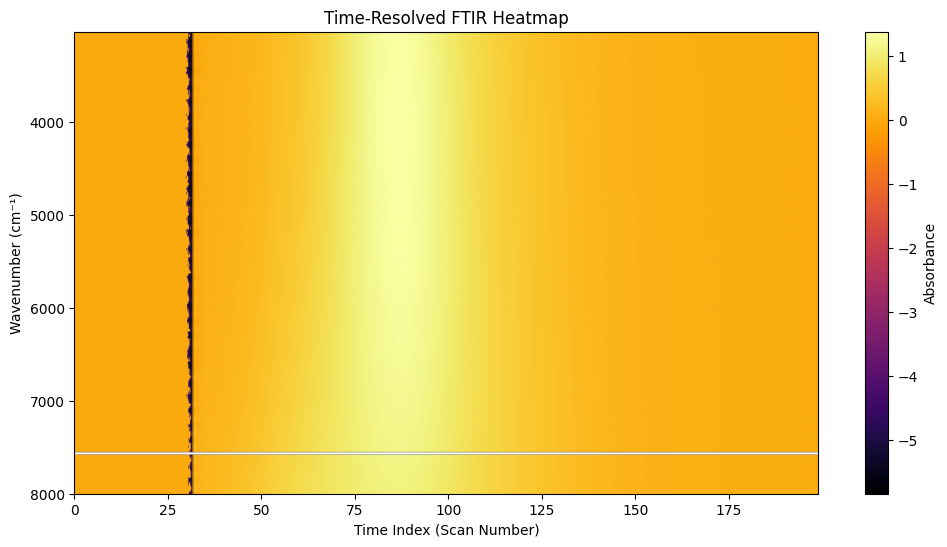

In [ ]:
plt.figure(figsize=(12, 6))
plt.imshow(corrected_abs.T, aspect='auto', cmap='inferno',
           extent=[0, corrected_abs.shape[1], wavenumbers[-1], wavenumbers[0]])
plt.colorbar(label='Absorbance')
plt.xlabel("Time Index (Scan Number)")
plt.ylabel("Wavenumber (cm⁻¹)")
plt.title("Time-Resolved FTIR Heatmap")
plt.show()


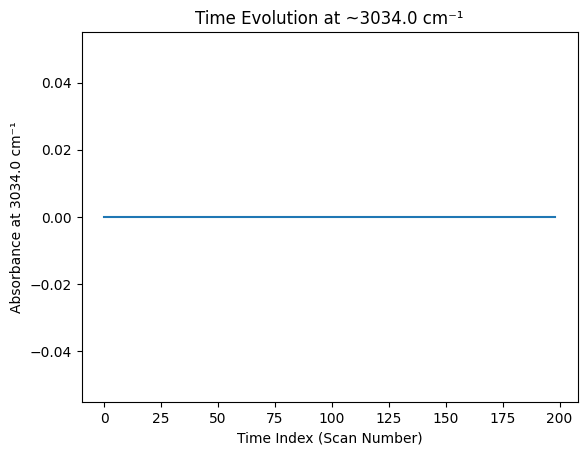

In [ ]:
target_wavenumber = 1635
idx = np.argmin(np.abs(wavenumbers - target_wavenumber))

plt.plot(corrected_abs[idx, :])
plt.xlabel("Time Index (Scan Number)")
plt.ylabel(f"Absorbance at {wavenumbers[idx]:.1f} cm⁻¹")
plt.title(f"Time Evolution at ~{wavenumbers[idx]:.1f} cm⁻¹")
plt.show()


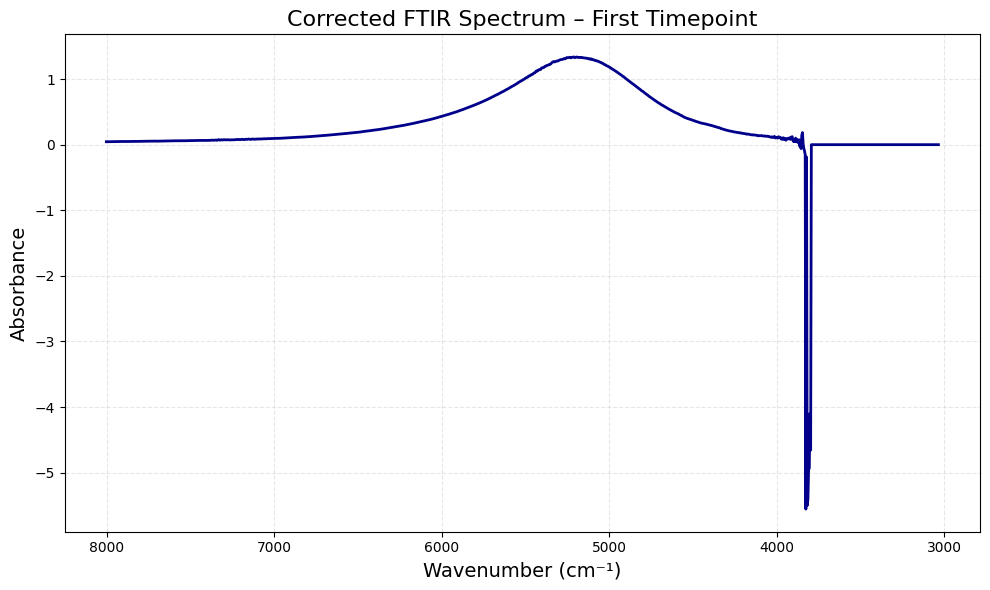

In [ ]:
import matplotlib.pyplot as plt

# Plot first corrected spectrum
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers, corrected_abs[:, 0], color='darkblue', linewidth=2)

# Styling
plt.gca().invert_xaxis()  # FTIR convention
plt.xlabel('Wavenumber (cm⁻¹)', fontsize=14)
plt.ylabel('Absorbance', fontsize=14)
plt.title('Corrected FTIR Spectrum – First Timepoint', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

# Optional: Save the figure
# plt.savefig("corrected_spectrum.png", dpi=300)

plt.show()


In [ ]:
import os

# Recursively list all files under extracted/
for root, dirs, files in os.walk("/content/extracted"):
    for f in files:
        print(os.path.join(root, f))



In [ ]:
import os

for root, dirs, files in os.walk("/content/extracted"):
    for file in files:
        if file.endswith(".csv"):
            print(os.path.join(root, file))


In [ ]:
# Sample (raw) continuous data
sample_path = "/content/extracted/27nm_7-5mM_gel/continuous/27nm_7-5mM_gel.csv"

# Background data
bkg_path = "/content/extracted/27nm_7-5mM_gel/continuous/7030_dmfeg_bkg.csv"


In [ ]:
import os

for root, dirs, files in os.walk("/content/extracted"):
    for file in files:
        if file.endswith(".csv"):
            print(os.path.join(root, file))


In [ ]:
# Sample (raw) continuous data
sample_path = "/content/extracted/27nm_7-5mM_gel/continuous/27nm_7-5mM_gel.csv"

# Background data
bkg_path = "/content/extracted/27nm_7-5mM_gel/continuous/7030_dmfeg_bkg.csv"



In [ ]:
sample_path = "/content/extracted/27nm_7-5mM_gel/continuous/27nm_7-5mM_gel.csv"
bkg_path = "/content/extracted/27nm_7-5mM_gel/continuous/7030_dmfeg_bkg.csv"


In [ ]:
import os

# Show all CSVs under extracted
for root, dirs, files in os.walk("/content/extracted"):
    for file in files:
        if file.endswith(".csv"):
            print(os.path.join(root, file))



In [ ]:
bkg_path = "/content/extracted/27nm_7-5mM_gel/continuous/7030_dmfeg_bkg.csv"



In [ ]:
import os

# Check if the file exists
file_check_path = "/content/extracted/27nm_7-5mM_gel/continuous/7030_dmfeg_bkg.csv"

print("Exists?", os.path.exists(file_check_path))



Exists? False


In [ ]:
for root, dirs, files in os.walk("/content/extracted"):
    print(f"In folder: {root}")
    for file in files:
        print("   ", file)


In [ ]:
import os

for root, dirs, files in os.walk("/content/extracted"):
    print(f"In folder: {root}")
    for file in files:
        print("   ", file)


In [ ]:
bkg_path = "/content/extracted/27nm_7-5mM_gel/continuous/7030_dmfeg_bkg.csv"


In [ ]:
import os

for root, dirs, files in os.walk("/content/extracted"):
    for file in files:
        if file.endswith(".csv"):
            print(os.path.join(root, file))


In [ ]:
bkg_path = "/content/extracted/.../your_background_file.csv"


In [ ]:
import os

# Find all CSV files inside your extracted folder
for root, dirs, files in os.walk("/content/extracted"):
    for file in files:
        if file.endswith(".csv"):
            print(os.path.join(root, file))


In [ ]:
import zipfile
import os

zip_path = "/content/27nm_7-5mM_gel.zip"  # this is the name of your uploaded file
extract_path = "/content/extracted"      # where we’ll unzip it

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Done extracting!")


✅ Done extracting!


In [ ]:
import os

# Find all CSV files inside the extracted folder
for root, dirs, files in os.walk("/content/extracted"):
    for file in files:
        if file.endswith(".csv"):
            print(os.path.join(root, file))


/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/27nm_7-5mM_gel.csv
/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/7030_dmfeg_bkg.csv
/content/extracted/27nm_7-5mM_gel/discontinuous/20250620_1145am/27nm_7-5mM_1145am.csv
/content/extracted/27nm_7-5mM_gel/discontinuous/20250620_1145am/7030_dmfeg_bkg.csv
/content/extracted/27nm_7-5mM_gel/continuous/27nm_7-5mM_gel.csv
/content/extracted/27nm_7-5mM_gel/continuous/7030_dmfeg_bkg.csv
/content/extracted/__MACOSX/27nm_7-5mM_gel/discontinuous/20250617_400pm/._7030_dmfeg_bkg.csv
/content/extracted/__MACOSX/27nm_7-5mM_gel/discontinuous/20250617_400pm/._27nm_7-5mM_gel.csv
/content/extracted/__MACOSX/27nm_7-5mM_gel/discontinuous/20250620_1145am/._27nm_7-5mM_1145am.csv
/content/extracted/__MACOSX/27nm_7-5mM_gel/discontinuous/20250620_1145am/._7030_dmfeg_bkg.csv
/content/extracted/__MACOSX/27nm_7-5mM_gel/continuous/._7030_dmfeg_bkg.csv
/content/extracted/__MACOSX/27nm_7-5mM_gel/continuous/._27nm_7-5mM_gel.csv


In [ ]:
sample_path = "/content/extracted/27nm_7-5mM_gel/continuous/27nm_7-5mM_gel.csv"
bkg_path = "/content/extracted/27nm_7-5mM_gel/continuous/7030_dmfeg_bkg.csv"


In [ ]:
import pandas as pd


In [ ]:
sample_path = "/content/extracted/27nm_7-5mM_gel/continuous/27nm_7-5mM_gel.csv"


In [ ]:
sample_path = "/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/27nm_7-5mM_gel.csv"


In [ ]:
import os

# Walk through and find all CSV files
for folder, subdirs, files in os.walk("/content/extracted"):
    for file in files:
        if file.endswith(".csv"):
            print(os.path.join(folder, file))


In [ ]:
import os

# Show all CSV files under the extracted folder
for root, dirs, files in os.walk("/content/extracted"):
    for file in files:
        if file.endswith(".csv"):
            print(os.path.join(root, file))


In [ ]:
import os

# Show EVERYTHING inside /content/extracted
for root, dirs, files in os.walk("/content/extracted"):
    print("📂 Folder:", root)
    for file in files:
        print("   📄", file)


In [ ]:
import os

# Show full directory tree starting from root
for root, dirs, files in os.walk("/content"):
    print("📁", root)
    for file in files:
        print("   📄", file)


📁 /content
   📄 27nm_7-5mM_gel.zip
📁 /content/.config
   📄 active_config
   📄 .last_survey_prompt.yaml
   📄 gce
   📄 hidden_gcloud_config_universe_descriptor_data_cache_configs.db
   📄 config_sentinel
   📄 .last_opt_in_prompt.yaml
   📄 default_configs.db
   📄 .last_update_check.json
📁 /content/.config/configurations
   📄 config_default
📁 /content/.config/logs
📁 /content/.config/logs/2025.07.09
   📄 21.17.09.730748.log
   📄 21.16.53.066931.log
   📄 21.16.13.024647.log
   📄 21.16.58.811005.log
   📄 21.17.10.513367.log
   📄 21.16.43.106255.log
📁 /content/sample_data
   📄 anscombe.json
   📄 README.md
   📄 california_housing_train.csv
   📄 mnist_train_small.csv
   📄 mnist_test.csv
   📄 california_housing_test.csv


In [ ]:
import zipfile
import os

zip_path = "/content/27nm_7-5mM_gel.zip"
extract_path = "/content/extracted"

# Extract the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ ZIP extracted!")


✅ ZIP extracted!


In [ ]:
for root, dirs, files in os.walk("/content/extracted"):
    print("📂", root)
    for file in files:
        print("   📄", file)


📂 /content/extracted
📂 /content/extracted/27nm_7-5mM_gel
   📄 .DS_Store
📂 /content/extracted/27nm_7-5mM_gel/discontinuous
   📄 .DS_Store
📂 /content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm
   📄 27nm_7-5mM_gel.csv
   📄 7030_dmfeg_bkg.csv
📂 /content/extracted/27nm_7-5mM_gel/discontinuous/20250620_1145am
   📄 27nm_7-5mM_1145am.csv
   📄 7030_dmfeg_bkg.csv
📂 /content/extracted/27nm_7-5mM_gel/continuous
   📄 27nm_7-5mM_gel.csv
   📄 7030_dmfeg_bkg.csv
📂 /content/extracted/__MACOSX
📂 /content/extracted/__MACOSX/27nm_7-5mM_gel
   📄 ._.DS_Store
   📄 ._discontinuous
   📄 ._continuous
📂 /content/extracted/__MACOSX/27nm_7-5mM_gel/discontinuous
   📄 ._20250617_400pm
   📄 ._.DS_Store
   📄 ._20250620_1145am
📂 /content/extracted/__MACOSX/27nm_7-5mM_gel/discontinuous/20250617_400pm
   📄 ._7030_dmfeg_bkg.csv
   📄 ._27nm_7-5mM_gel.csv
📂 /content/extracted/__MACOSX/27nm_7-5mM_gel/discontinuous/20250620_1145am
   📄 ._27nm_7-5mM_1145am.csv
   📄 ._7030_dmfeg_bkg.csv
📂 /content/extracted/__MACOSX/

In [ ]:
import os

root_path = "/content/extracted"
for dirpath, dirnames, filenames in os.walk(root_path):
    print(f"\n📁 {dirpath}")
    for file in filenames:
        print(f"   📄 {file}")



In [ ]:
import zipfile
import os

zip_path = "/content/27nm_7-5mM_gel.zip"
extract_to = "/content/extracted"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Unzipped!")


✅ Unzipped!


In [ ]:
import os



In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/extracted"):
    print(f"\n📁 {dirpath}")
    for file in filenames:
        print(f"   📄 {file}")



📁 /content/extracted

📁 /content/extracted/27nm_7-5mM_gel
   📄 .DS_Store

📁 /content/extracted/27nm_7-5mM_gel/continuous
   📄 7030_dmfeg_bkg.csv
   📄 27nm_7-5mM_gel.csv

📁 /content/extracted/27nm_7-5mM_gel/discontinuous
   📄 .DS_Store

📁 /content/extracted/27nm_7-5mM_gel/discontinuous/20250620_1145am
   📄 7030_dmfeg_bkg.csv
   📄 27nm_7-5mM_1145am.csv

📁 /content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm
   📄 7030_dmfeg_bkg.csv
   📄 27nm_7-5mM_gel.csv

📁 /content/extracted/__MACOSX

📁 /content/extracted/__MACOSX/27nm_7-5mM_gel
   📄 ._continuous
   📄 ._discontinuous
   📄 ._.DS_Store

📁 /content/extracted/__MACOSX/27nm_7-5mM_gel/continuous
   📄 ._7030_dmfeg_bkg.csv
   📄 ._27nm_7-5mM_gel.csv

📁 /content/extracted/__MACOSX/27nm_7-5mM_gel/discontinuous
   📄 ._20250620_1145am
   📄 ._20250617_400pm
   📄 ._.DS_Store

📁 /content/extracted/__MACOSX/27nm_7-5mM_gel/discontinuous/20250620_1145am
   📄 ._7030_dmfeg_bkg.csv
   📄 ._27nm_7-5mM_1145am.csv

📁 /content/extracted/__MACOSX/27nm_7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
sample_path = "/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/27nm_7-5mM_gel.csv"
bkg_path = "/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/7030_dmfeg_bkg.csv"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the file
sample_path = "/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/27nm_7-5mM_gel.csv"

# Load file (skip header row)
raw_df = pd.read_csv(sample_path, header=1)

# Transpose
raw_df_t = raw_df.T

# Reset index to turn the original row labels into a column
raw_df_t = raw_df_t.reset_index(drop=True)

# Extract wavenumbers from first column
wavenumbers = raw_df_t.iloc[:, 0].astype(float).values

# Extract absorbance matrix (rest of the columns)
absorbance_matrix = raw_df_t.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').values




In [ ]:
# Path to background file
bkg_path = "/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/7030_dmfeg_bkg.csv"

# Load background data (skip header row)
bkg_df = pd.read_csv(bkg_path, header=1)

# Transpose and reset
bkg_df_t = bkg_df.T.reset_index(drop=True)

# Extract background absorbance values
background = bkg_df_t.iloc[:, 1].astype(float).values


In [ ]:
print("Corrected absorbance shape:", corrected_absorbance.shape)
print("Wavenumbers shape:", wavenumbers.shape)
print("\nFirst 5 wavenumbers:", wavenumbers[:5])
print("\nFirst 5 absorbance values (first column):", corrected_absorbance[:5, 0])



Corrected absorbance shape: (3, 3990)
Wavenumbers shape: (3,)

First 5 wavenumbers: [3034.   10.   nan]

First 5 absorbance values (first column): [ 0.  0. nan]


In [ ]:
sample_path = "/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/27nm_7-5mM_gel.csv"
bkg_path = "/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/7030_dmfeg_bkg.csv"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
sample_path = "/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/27nm_7-5mM_gel.csv"
bkg_path = "/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/7030_dmfeg_bkg.csv"


In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("/content/extracted"):
    print(f"\n📁 {dirpath}")
    for file in filenames:
        print(f"   📄 {file}")



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 27nm_7-5mM_gel.zip to 27nm_7-5mM_gel (1).zip


In [ ]:
import zipfile
import os

zip_path = "/content/27nm_7-5mM_gel.zip"
extract_path = "/content/extracted"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Zip extracted to", extract_path)


✅ Zip extracted to /content/extracted


In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/extracted"):
    print(f"\n📁 {dirpath}")
    for file in filenames:
        print(f"   📄 {file}")



📁 /content/extracted

📁 /content/extracted/27nm_7-5mM_gel
   📄 .DS_Store

📁 /content/extracted/27nm_7-5mM_gel/continuous
   📄 7030_dmfeg_bkg.csv
   📄 27nm_7-5mM_gel.csv

📁 /content/extracted/27nm_7-5mM_gel/discontinuous
   📄 .DS_Store

📁 /content/extracted/27nm_7-5mM_gel/discontinuous/20250620_1145am
   📄 7030_dmfeg_bkg.csv
   📄 27nm_7-5mM_1145am.csv

📁 /content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm
   📄 7030_dmfeg_bkg.csv
   📄 27nm_7-5mM_gel.csv

📁 /content/extracted/__MACOSX

📁 /content/extracted/__MACOSX/27nm_7-5mM_gel
   📄 ._continuous
   📄 ._discontinuous
   📄 ._.DS_Store

📁 /content/extracted/__MACOSX/27nm_7-5mM_gel/continuous
   📄 ._7030_dmfeg_bkg.csv
   📄 ._27nm_7-5mM_gel.csv

📁 /content/extracted/__MACOSX/27nm_7-5mM_gel/discontinuous
   📄 ._20250620_1145am
   📄 ._20250617_400pm
   📄 ._.DS_Store

📁 /content/extracted/__MACOSX/27nm_7-5mM_gel/discontinuous/20250620_1145am
   📄 ._7030_dmfeg_bkg.csv
   📄 ._27nm_7-5mM_1145am.csv

📁 /content/extracted/__MACOSX/27nm_7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
sample_path = "/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/27nm_7-5mM_gel.csv"
bkg_path = "/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/7030_dmfeg_bkg.csv"


In [ ]:
# Load the sample CSV
raw_df = pd.read_csv(sample_path, header=0)

# Drop empty or unnamed columns
raw_df = raw_df.loc[:, ~raw_df.columns.str.contains('^Unnamed')]

# Set index to first column (sample labels)
raw_df.set_index(raw_df.columns[0], inplace=True)

# Extract wavenumbers from column names (as floats)
wavenumbers = raw_df.columns.astype(float).values

# Convert data to numeric absorbance matrix
absorbance_matrix = raw_df.apply(pd.to_numeric, errors='coerce').values



In [ ]:
bkg_df = pd.read_csv(bkg_path, header=0)
bkg_df.set_index(bkg_df.columns[0], inplace=True)

background = bkg_df.apply(pd.to_numeric, errors='coerce').values.mean(axis=0)


In [ ]:
import pandas as pd



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os



In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/extracted/27nm_7-5mM_gel"):
    print(f"\n📁 {dirpath}")
    for file in filenames:
        print(f"   📄 {file}")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 27nm_7-5mM_gel.zip to 27nm_7-5mM_gel (1).zip


In [ ]:
import zipfile
import os

zip_path = "/content/27nm_7-5mM_gel.zip"  # 👈 change this if your file is named differently
extract_to = "/content/extracted"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Extraction complete")


✅ Extraction complete


In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/extracted/27nm_7-5mM_gel"):
    print(f"\n📁 {dirpath}")
    for file in filenames:
        print(f"   📄 {file}")



📁 /content/extracted/27nm_7-5mM_gel
   📄 .DS_Store

📁 /content/extracted/27nm_7-5mM_gel/continuous
   📄 7030_dmfeg_bkg.csv
   📄 27nm_7-5mM_gel.csv

📁 /content/extracted/27nm_7-5mM_gel/discontinuous
   📄 .DS_Store

📁 /content/extracted/27nm_7-5mM_gel/discontinuous/20250620_1145am
   📄 7030_dmfeg_bkg.csv
   📄 27nm_7-5mM_1145am.csv

📁 /content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm
   📄 7030_dmfeg_bkg.csv
   📄 27nm_7-5mM_gel.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Use the files from 20250617_400pm
sample_path = "/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/27nm_7-5mM_gel.csv"
bkg_path = "/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/7030_dmfeg_bkg.csv"


In [ ]:
bkg_df = pd.read_csv(bkg_path, header=0)
print("Original background DataFrame:")
print(bkg_df.head())
print("\nColumns:", bkg_df.columns.tolist())


Original background DataFrame:
          7030_dmfeg Unnamed: 1 Unnamed: 2
0  Wavenumber (cm-1)        Abs        NaN
1               3034         10        NaN
2            3035.25         10        NaN
3             3036.5         10        NaN
4            3037.75         10        NaN

Columns: ['7030_dmfeg', 'Unnamed: 1', 'Unnamed: 2']


In [ ]:
import pandas as pd




In [ ]:
bkg_path = "/content/extracted/27nm_7-5mM_gel/discontinuous/20250617_400pm/7030_dmfeg_bkg.csv"



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("/content/extracted"):
    for file in filenames:
        print("📄", os.path.join(dirpath, file))



In [ ]:
import zipfile

zip_path = "/content/<your_actual_file_name>.zip"  # I’ll give you this
extract_to = "/content/extracted"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Extraction complete")


FileNotFoundError: [Errno 2] No such file or directory: '/content/<your_actual_file_name>.zip'